<a href="https://colab.research.google.com/github/shahriar1990/Deep_Learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with the neural network in Tensorflow

there are many definition for a regressionm problem but in our case,we're going to simply it:
predecting a numerical variable based on som other combination of variables,even shorter ... predicting a number


In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# creating data  to view and fit

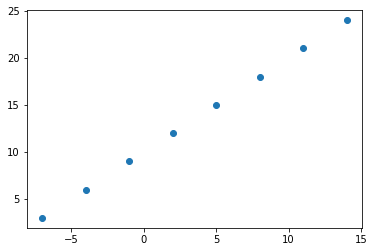

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#creating features

x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#crating lables

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(x,y)


In [3]:
y == x +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

* Input and output shape

In [4]:
# crate a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = x.shape 
output_shape = y.shape
input_shape,output_shape


((8,), (8,))

In [6]:
x[1],y[1]

(-4.0, 6.0)

In [7]:
#turn on NumPy array into tensor
X = tf.cast(tf.constant(x), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X ,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape =  y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

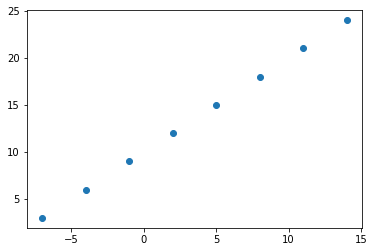

In [9]:
plt.scatter(X,y)

## Step in modeling with tensorflow


1. **creating a model**  -define the input and output layer
2. **compiling a model** -define the loss function (in other word ,the loss function tell our model how wrong it is) and the optimizer ( tell our model how to improve the patterns its learnings) end evalution metrics (what we can use to interpret)
3. **fitting a model** - latting the model try to find pattern between  X and Y (features and labels)

In [10]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 458ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model
we can improve our model by altering the steps we took a crweat a model.



1. **Creating a model** -are we might add more layers,increase the number of hidden units within each of the hidden , change the activation function of each layer 

2. **compiling a model**  -here we might change the optimization function or perhaps **learning rate** of the optimization function

3. **Fitting model** - here we might fit a model for more **epochs** (leave it traning for longer)  or on more data(give the model more examples to learn form)


In [13]:
# Let's rebuild our model
# 1. create the model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile the model 
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])
# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100,verbose=0)

In [14]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [15]:
# Let's see if we can make another to improve our model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. compiling the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.004),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y ,epochs=100,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
model.predict([17.0])

array([[27.47404]], dtype=float32)

In [17]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Evaluating model 
**build a model** -> **fit it**  -> 
**evaluate it**

```Make a bigger dataset```

In [18]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

``` Make labels to dataset```

In [19]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

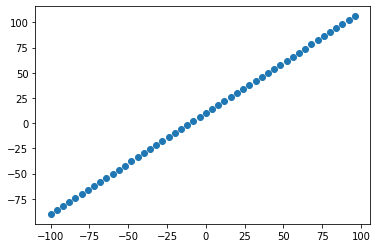

In [20]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### the 3 sets
**Training set** - the model learn from this data,which is typicaly 70-80% of total data you have avalebal.

**Validation set** - the model sets tuned on this data, which is typically 10-15% of the data avlibale.

**Test set** - the model gets evluated on this data to test what is has learned ,this set is typically 10-15% of the total data avlibale.

In [21]:
# check the length of how many samples we have
len(X), len(y)

(50, 50)

In [22]:
# split the data into the train and test set

X_train =X[:40] #first 40 are training sample(80% of the data)
y_train = y [:40]
X_test =X[40:] # last 10 are testing sample (20% of data)
y_test = y[40:]


len(X_train) , len(X_test)  , len(y_train) , len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets ... lets visualize it again

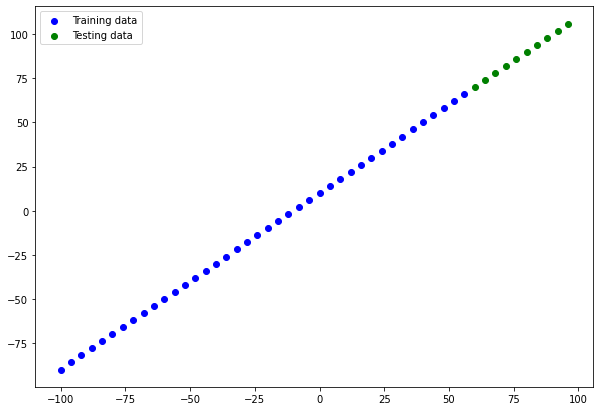

In [23]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

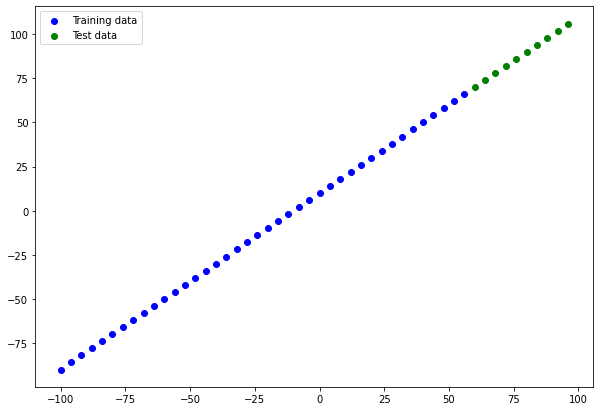

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train , c="b", label="Training data")
plt.scatter(X_test, y_test,c="g" , label="Test data")
plt.legend();

In [25]:
# Let's have a look at how to build  a neural network for our data

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1]),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. compiling the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.004),
              metrics=["mae"])
model.fit(X_train,y_train,epochs=50,verbose=0)

model.summary()


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 100)               1100      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


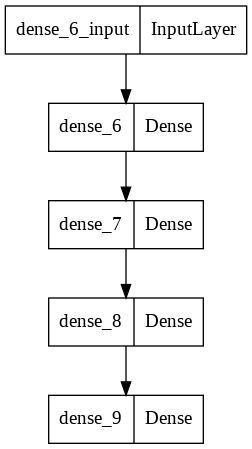

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

**`Visualizing the model`** 

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 100)               1100      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


In [28]:
X_train[0],y_train[0]
# print("shape:",X[0])

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [29]:
#lets create a model which build automatically by defining the input shape
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
  tf.keras.layers.Dense(1,name='output_layer')  
],name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total parameter means 🤪 total number of parameter in the model **these are the pattern theat the model is going to learn**( the relationship between X , Y)


* Trainable parameter ⁉ **the pattern the model can update**

* None trainable parameter **these parameters arn't updated during tuning** ```this is typical when you bring is alradey learn pattern or parameter from  other model training during transfer learning```
🔗https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI

In [30]:
# Lte's fit our model to the training data

model.fit(X_train,y_train,verbose=0,epochs=100)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


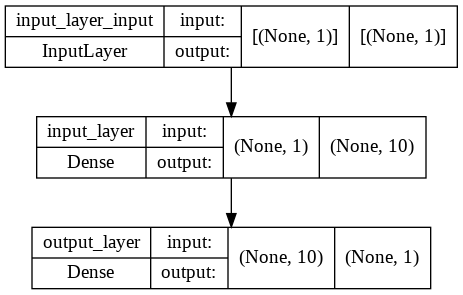

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

**visualizing our models prediction**


To visualize prediction . it's a good idea to plot them against the groung truth label
often you'll see this in the form of ```y_test``` versus ```y_pred``` (ground truth versus youer models predictions)

In [33]:
#Make some prediction 
y_pred = model.predict(X_test )
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
#Let's see how we visualiz them



***Note:*** if you feel like you're going to reuse some kind of functionality in the future ,it's good idea to turn it in the function

In [36]:
# Let's create a plotting function 
def plot_prediction(train_data=X_train,train_labels=y_train,
                    test_data= X_test,
                    test_labels=y_test,
                    prediction=y_pred):
  """
  plot training data ,test data and copares prediction to grounf truth labels
  """
  plt.figure(figsize=(10,7))
  #ploting train data in blue
  plt.scatter(train_data,train_labels,c = "b", label= "Training data")
  #ploting test data in green
  plt.scatter(test_data,test_labels,c ='g', label= "Testing data")
  #plot model prediction in red
  plt.scatter(test_data,prediction, c='r',label= 'prediction')
  #show the legend
  plt.legend()


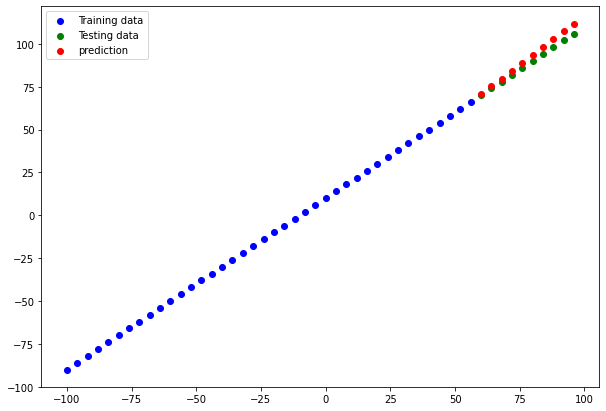

In [37]:
plot_prediction(train_data=X_train,train_labels=y_train,
                    test_data= X_test,
                    test_labels=y_test,
                    prediction=y_pred)

## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for ```regression``` problems are:

* Mean absolute error **(MAE)** - the mean difference between each of the predictions.
Mean squared error **(MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

* You can also use **model.evaluate()** which will return the loss of the model as well as any metrics setup during the compile step.

In [38]:
# Evaluate a model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 319ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [39]:
#calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred= tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [41]:
y_pred, y_test

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [43]:
mae = tf.keras.metrics.mean_absolute_error(y_true=y_test,
                                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [44]:
# calculate the mean square error
mse = tf.keras.metrics.mean_squared_error(y_true= y_test,
                                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [45]:
# Make some function to reuse MAE , MSE
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred=tf.squeeze(y_pred))

## Running expriments to improve a model
build a model  -> fit it -> evaluate it -> tweak it ->fit it -> evaluate it -> tweak it fit it -> evaluate it 

* 1.get more example your model for your model to train on (more opportunities to learn patterns or relationships between future and labels
* 2. make more model larger ( using a more complex model) this might come in the from of more layer or more hidden units in each layer.
* 3. train for longer (give your model more of a chance to find patterns in the data


Lets do 3 modeling expriment

1. `model_1`- some the orginel model ,1 layer, trained for 100 epochs
2. `model_2` 2 layers ,trained for 100 epochs
3. `model_3`  2 layer , trained for 500 epochs 


**Build model_1**

In [46]:
# set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(1) 
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step -

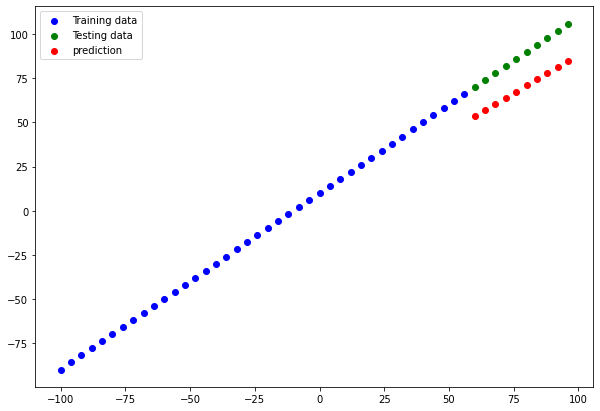

In [47]:
y_pred_1 = model_1.predict(X_test)
plot_prediction(prediction=y_pred_1)

In [48]:
tf.constant(y_pred_1) , tf.squeeze(y_pred_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [49]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build a model_2**

In [50]:
# set the random seed
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mse'])
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

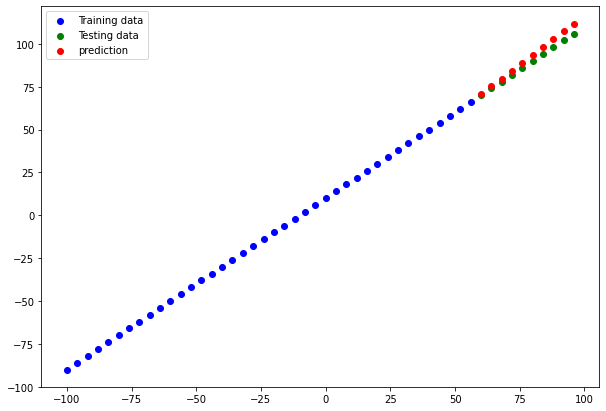

In [51]:
y_pred_2 = model_2.predict(X_test)
plot_prediction(prediction=y_pred_2)

In [52]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model 3**

In [53]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train , epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 15ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 1

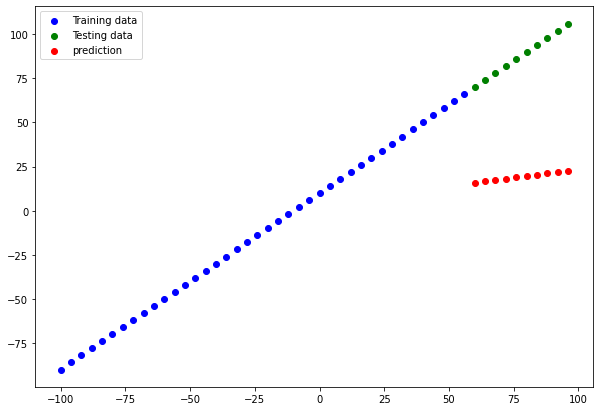

In [54]:
y_pred_3 = model_3.predict(X_test)
plot_prediction(prediction=y_pred_3)

In [55]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mse_3 , mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.713615>)

Comparing the result of our expriment

**Note:** you want to start withe the small expriment and make shore they work then increase their scale when necessary

In [56]:
# Let's compile our model 's result using a panda dataframe

import pandas as pd
model_result = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]
all_result = pd.DataFrame(model_result,columns= ['model','mae','mse'])
all_result

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,68.713615


In [57]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Saving our model 
saving our model allows us yse them outside of google colab or web application  or mobile app.

there are two main format we can save our model
1. the SaveModel format
2. the HDFS format

In [58]:
# save model using the SaveModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [59]:
# save model using the HDFS format
model_2.save('my_model_2.h5')

In [69]:
# Loading in a save model
loaded_SaveModel_Format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SaveModel_Format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compare model_2 prediction ith SavModel format model prediction
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_Format_preds = loaded_SaveModel_Format.predict(X_test)
model_2_preds == loaded_SaveModel_Format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
## Download a model (or any other file) from google colab
from google.colab import files
files.download("/content/my_model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A Large Example

In [73]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [74]:
# import requieret library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Read insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [80]:
# create X & Y values (features and labels)
X = insurance_one_hot.drop('charges', axis =1)
y = insurance_one_hot['charges']

In [82]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [83]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [84]:
# create traning and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [85]:
len(X), len(y),len(X_train),len(y_train)

(1338, 1338, 1070, 1070)

In [87]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [86]:
# build a neural network(sort of like model_2 above)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [90]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [91]:
#check  the result of this model on the test data
insurance_evaluate = insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


To try to improve our model
1. add an extra layer with more hidden unit
2. train for longer
3. insert your own expriment here

In [100]:
tf.random.set_seed(42)
insurance_model_2= tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)  
])
insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])
insurance_model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0815 - mae:

In [101]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [102]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [105]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history = insurance_model_3.fit(tf.expand_dims(X_train, axis=1),
                                y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0815 - mae:

In [106]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [107]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

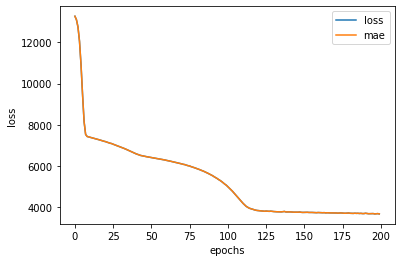

In [109]:
#plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

CallBack

how long should you train for?
[Early Stopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) ,which is a tensorflow component you can add to your model to stop traning ones is step improving a certin metrics.

In [110]:
 X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


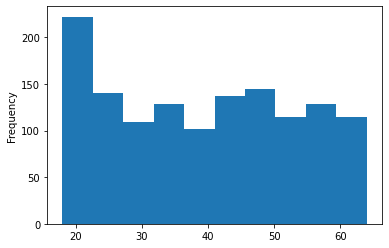

In [111]:
X['age'].plot(kind='hist')

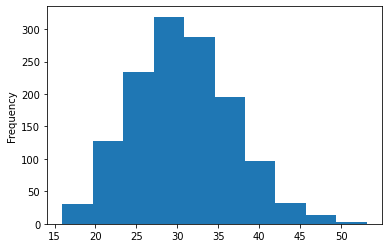

In [112]:
X['bmi'].plot(kind='hist')

preprocessing data (normalization and standardization)

in term of scaling values,neural network tend to prefer normalization.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# Reade in insurance dataFarm

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
     (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)
X = insurance.drop('charges',axis=1)
y = insurance['charges']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

#fit the column transformer to training data


ct.fit(X_train)
#Transform and test data with the normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [119]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [123]:
X_train_normal[19]

array([0.73913043, 0.69518429, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

Beatiful our data has been normalized and one hot encoded.
Now Let's build a neural network model on it.

In [131]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = insurance_model_3.fit(tf.expand_dims(X_train_normal,axis=1), y_train, epochs=100, verbose=0) 

In [132]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


Text(0.5, 0, 'epochs')

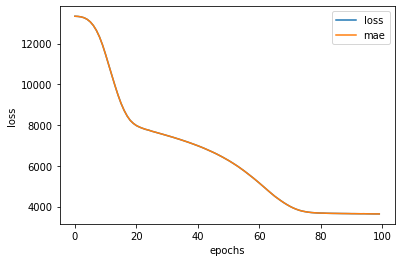

In [133]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')